In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
# Load the dataset
df = pd.read_csv("reviews_cleaned.csv")
df = df.sample(n=5000, random_state=42)
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,208989,B001FA1L6Q,A2QUAY400E46W0,Casey S. Law,0,0,1,1349913600,Bad batch,I've bought Joyva tahini for 4 years and never...,negative,-1,90
2586,510878,B001EO6H4Y,A1WXJ1I42UOQ2V,AuburnTygr,0,0,5,1234396800,Simply Delicious!,I've been reading and studying the benefits of...,positive,1,118
2653,164074,B000CQE3NM,A2I6FFCUE6KID9,"Stone Maven ""Stone Maven""",0,0,5,1320451200,The only green tea I like,"I drink Twinings Orange Pekoe black tea, raspb...",positive,1,32
1055,541039,B004VLVB4S,A3P0KRIFFOVU1W,Gordon M. Earsley,0,0,5,1338076800,"""Thick"" versus ""Steel Cut""","The ""thick"" Rolled oats does a good job replac...",positive,1,45
705,254064,B001EO5X6M,A1PTVRRBFKKOJ5,Readwhenican,0,0,5,1346112000,Soft curls!!!,I buy this product in bulk. I won't use anythi...,positive,1,24


In [105]:
#Information about the dataset
df.info()
#Summary statistics of the dataset
df.describe()
#returns  number of columns and rows
print(df.shape)
#check for missing values
df.isnull().sum()
#fill the empty rows
df['Summary'] = df['Summary'].fillna("No Summary")


<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 1501 to 860
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
 10  Sentiment               5000 non-null   object
 11  Sentiment_Label         5000 non-null   int64 
 12  review_length           5000 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 546.9+ KB
(5000, 13)


In [106]:
# Check for duplicates
print(df.duplicated().sum())
#Removes duplicated rows
data_cleaned = df.drop_duplicates()


0


In [107]:
#Handling the Outliers

#calucte the review length(Number of words in the review)
df['review_length'] = df['Text'].apply(lambda x: len(str(x).split()))

df.head()




,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length
1501,208989,B001FA1L6Q,A2QUAY400E46W0,Casey S. Law,0,0,1,1349913600,Bad batch,I've bought Joyva tahini for 4 years and never...,negative,-1,90
2586,510878,B001EO6H4Y,A1WXJ1I42UOQ2V,AuburnTygr,0,0,5,1234396800,Simply Delicious!,I've been reading and studying the benefits of...,positive,1,118
2653,164074,B000CQE3NM,A2I6FFCUE6KID9,"Stone Maven ""Stone Maven""",0,0,5,1320451200,The only green tea I like,"I drink Twinings Orange Pekoe black tea, raspb...",positive,1,32
1055,541039,B004VLVB4S,A3P0KRIFFOVU1W,Gordon M. Earsley,0,0,5,1338076800,"""Thick"" versus ""Steel Cut""","The ""thick"" Rolled oats does a good job replac...",positive,1,45
705,254064,B001EO5X6M,A1PTVRRBFKKOJ5,Readwhenican,0,0,5,1346112000,Soft curls!!!,I buy this product in bulk. I won't use anythi...,positive,1,24


In [108]:
def score_to_sentiment(score):
    if score <= 2:
        return 'negative'
    elif score == 3:
        return 'neutral'
    else:
        return 'positive'

In [109]:
df['Sentiment'] = df['Score'].apply(score_to_sentiment)

In [110]:
print(df['Sentiment'].value_counts())
print(df.head())

Sentiment
positive    3919
negative     703
neutral      378
Name: count, dtype: int64
          Id   ProductId          UserId                ProfileName  \
1501  208989  B001FA1L6Q  A2QUAY400E46W0               Casey S. Law   
2586  510878  B001EO6H4Y  A1WXJ1I42UOQ2V                 AuburnTygr   
2653  164074  B000CQE3NM  A2I6FFCUE6KID9  Stone Maven "Stone Maven"   
1055  541039  B004VLVB4S  A3P0KRIFFOVU1W          Gordon M. Earsley   
705   254064  B001EO5X6M  A1PTVRRBFKKOJ5               Readwhenican   

      HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
1501                     0                       0      1  1349913600   
2586                     0                       0      5  1234396800   
2653                     0                       0      5  1320451200   
1055                     0                       0      5  1338076800   
705                      0                       0      5  1346112000   

                         Summary  \
1501       

In [111]:
# Map sentiment to numbers
sentiment_map = {'negative': -1, 'neutral': 0, 'positive': 1}
df['Sentiment_Label'] = df['Sentiment'].map(sentiment_map)

# Reorder columns to place Sentiment_Label next to Sentiment
sentiment_col = df.pop('Sentiment_Label')
df.insert(df.columns.get_loc('Sentiment') + 1, 'Sentiment_Label', sentiment_col)

# Preview
print(df[['Sentiment', 'Sentiment_Label']].head())


     Sentiment  Sentiment_Label
1501  negative               -1
2586  positive                1
2653  positive                1
1055  positive                1
705   positive                1


In [112]:
df.to_csv('reviews_cleaned.csv', index=False)

In [113]:

for column in df.columns:
    print(f"Unique values in '{column}':")
    print(df[column].value_counts())
    print("-" * 50)

Unique values in 'Id':
Id
208989    1
203799    1
110271    1
44397     1
432388    1
         ..
495849    1
397626    1
16419     1
484920    1
415585    1
Name: count, Length: 5000, dtype: int64
--------------------------------------------------
Unique values in 'ProductId':
ProductId
B007JFMH8M    13
B001RVFEP2    10
B000VK8AVK    10
B000PDWBKO     9
B000NMJWZO     8
              ..
B0029NILPW     1
B0002RE0K2     1
B00018CWLQ     1
B003VCULUS     1
B005KSJD8C     1
Name: count, Length: 3805, dtype: int64
--------------------------------------------------
Unique values in 'UserId':
UserId
A1YUL9PCJR3JTY    8
AY12DBB0U420B     5
A29JUMRL1US6YP    4
A281NPSIMI1C2R    4
A2YNIKQDLZR2WW    4
                 ..
A21TR8QCO720IR    1
A2MP5ALLQKSQSA    1
APKM6UYJWUH2M     1
A15H73KHFVDRCW    1
AHSTORTK0XTH6     1
Name: count, Length: 4810, dtype: int64
--------------------------------------------------
Unique values in 'ProfileName':
ProfileName
O. Brown "Ms. O. Khannah-Brown"           8


In [114]:
import string
import re  
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from num2words import num2words 




[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\perei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [116]:
def clean_text(text):
    text = BeautifulSoup(str(text), "html.parser").get_text()
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', lambda match: num2words(int(match.group())), text)  # Convert digits to words
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply the function to the 'Text' column (adjusting the column name)
df['clean_review'] = df['Text'].apply(clean_text)

# Verify the output
print(df[['Text', 'clean_review']].head())  # Check the first few rows

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\2180239856.py:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(str(text), "html.parser").get_text()


                                                   Text  \
1501  I've bought Joyva tahini for 4 years and never...   
2586  I've been reading and studying the benefits of...   
2653  I drink Twinings Orange Pekoe black tea, raspb...   
1055  The "thick" Rolled oats does a good job replac...   
705   I buy this product in bulk. I won't use anythi...   

                                           clean_review  
1501  ive bought joyva tahini four years never bad e...  
2586  ive reading studying benefits honey purchasing...  
2653  drink twinings orange pekoe black tea raspberr...  
1055  thick rolled oats good job replacing steel cut...  
705   buy product bulk wont use anything else natura...  


In [117]:
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,Sentiment_Label,review_length,clean_review
1501,208989,B001FA1L6Q,A2QUAY400E46W0,Casey S. Law,0,0,1,1349913600,Bad batch,I've bought Joyva tahini for 4 years and never...,negative,-1,90,ive bought joyva tahini four years never bad e...
2586,510878,B001EO6H4Y,A1WXJ1I42UOQ2V,AuburnTygr,0,0,5,1234396800,Simply Delicious!,I've been reading and studying the benefits of...,positive,1,118,ive reading studying benefits honey purchasing...
2653,164074,B000CQE3NM,A2I6FFCUE6KID9,"Stone Maven ""Stone Maven""",0,0,5,1320451200,The only green tea I like,"I drink Twinings Orange Pekoe black tea, raspb...",positive,1,32,drink twinings orange pekoe black tea raspberr...
1055,541039,B004VLVB4S,A3P0KRIFFOVU1W,Gordon M. Earsley,0,0,5,1338076800,"""Thick"" versus ""Steel Cut""","The ""thick"" Rolled oats does a good job replac...",positive,1,45,thick rolled oats good job replacing steel cut...
705,254064,B001EO5X6M,A1PTVRRBFKKOJ5,Readwhenican,0,0,5,1346112000,Soft curls!!!,I buy this product in bulk. I won't use anythi...,positive,1,24,buy product bulk wont use anything else natura...


# Exploratory data analysis

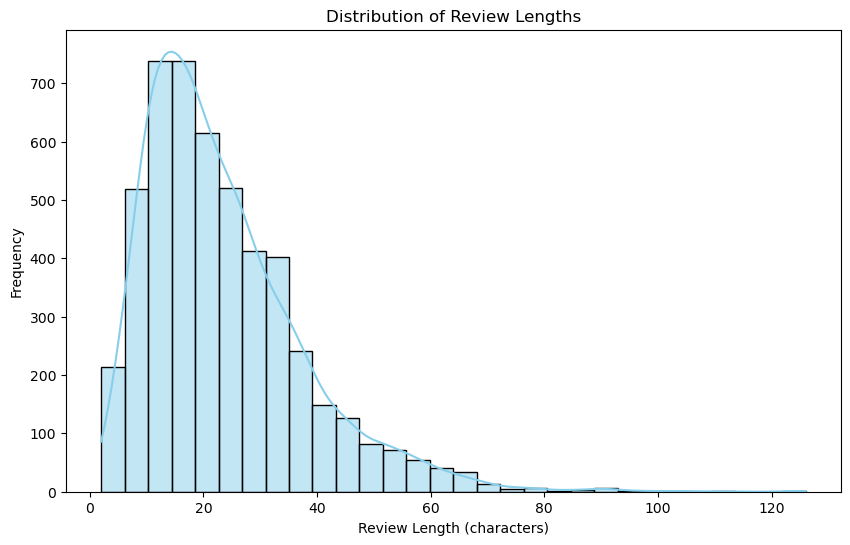

In [118]:
# Visualizing review text lengths
df['review_length'] = df['Summary'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (characters)')
plt.ylabel('Frequency')
plt.show()


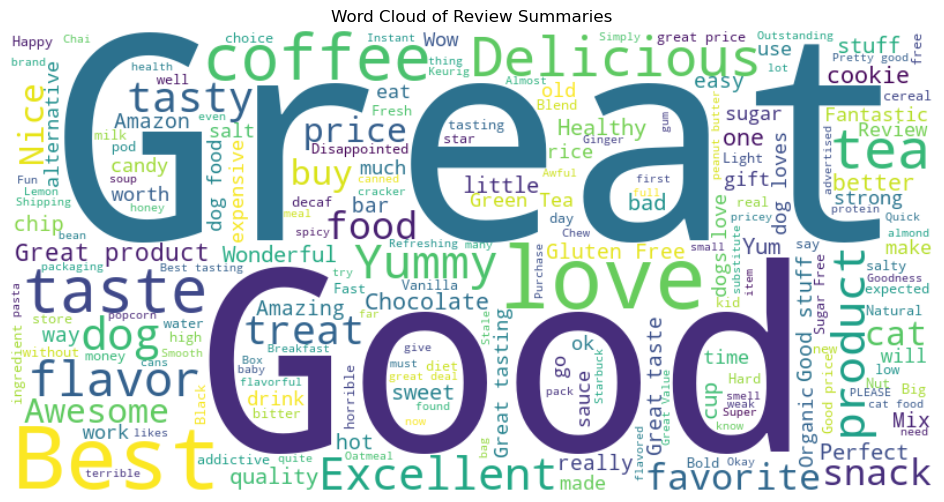

In [119]:
# Word cloud (if text-based)
from wordcloud import WordCloud

text = " ".join(df['Summary'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(15, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_18988\4010540876.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


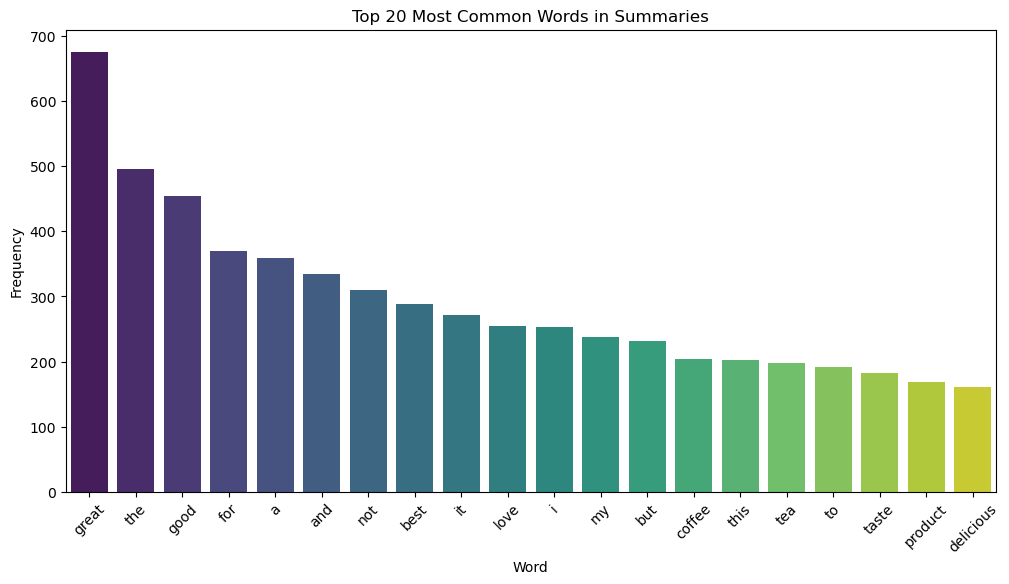

In [120]:
# Top 20 most common words (basic frequency count)
from collections import Counter
import re

words = []
for summary in df['Summary']:
    words += re.findall(r'\b\w+\b', summary.lower())

word_freq = Counter(words)
common_words = word_freq.most_common(20)

words, freqs = zip(*common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(freqs), palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words in Summaries')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()


C:\Users\perei\AppData\Local\Temp\ipykernel_18988\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


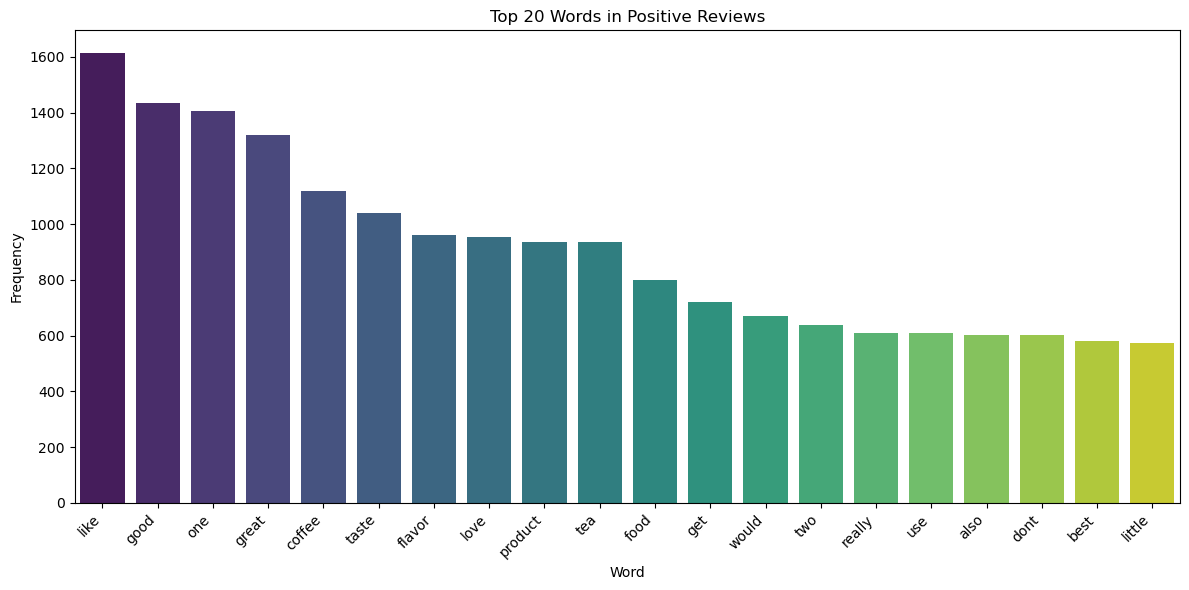

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\396244479.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(freqs), palette='viridis')


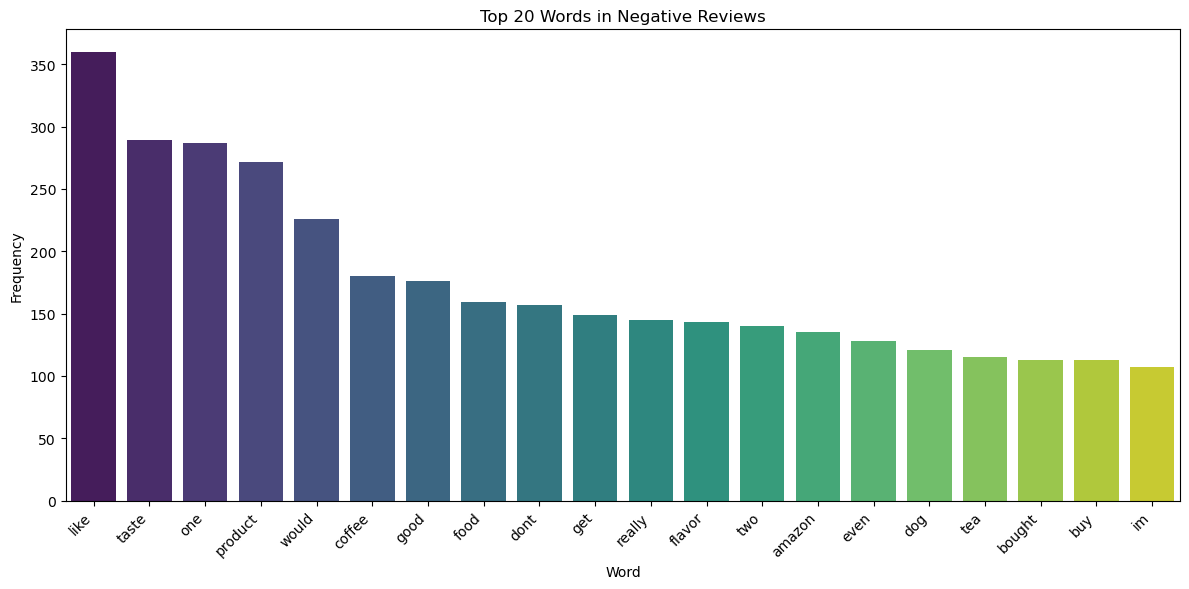

In [121]:
from collections import Counter

# Function to count word frequencies and display a bar graph
def word_frequency_graph(text_column, title="Top 20 Most Common Words", top_n=20):
    all_words = ' '.join(text_column).split()
    word_counts = Counter(all_words)
    common_words = word_counts.most_common(top_n)

    words, freqs = zip(*common_words)  # Unzip words and frequencies

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(freqs), palette='viridis')
    plt.xticks(rotation=45, ha='right')  # Rotating x-axis labels for better readability
    plt.title(title)
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjusting layout to prevent labels from overlapping
    plt.show()

# Get common words for positive and negative reviews and display graphs
positive_reviews = df[df['Sentiment'] == 'positive']['clean_review']
negative_reviews = df[df['Sentiment'] == 'negative']['clean_review']

word_frequency_graph(positive_reviews, title="Top 20 Words in Positive Reviews")
word_frequency_graph(negative_reviews, title="Top 20 Words in Negative Reviews")

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


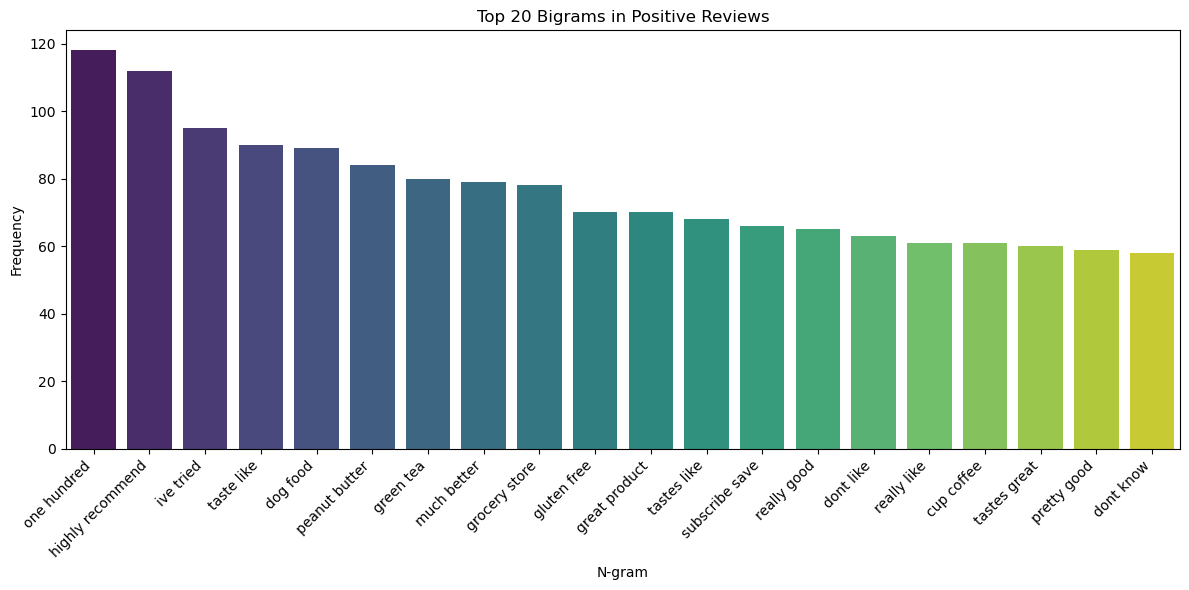

C:\Users\perei\AppData\Local\Temp\ipykernel_18988\278421220.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')


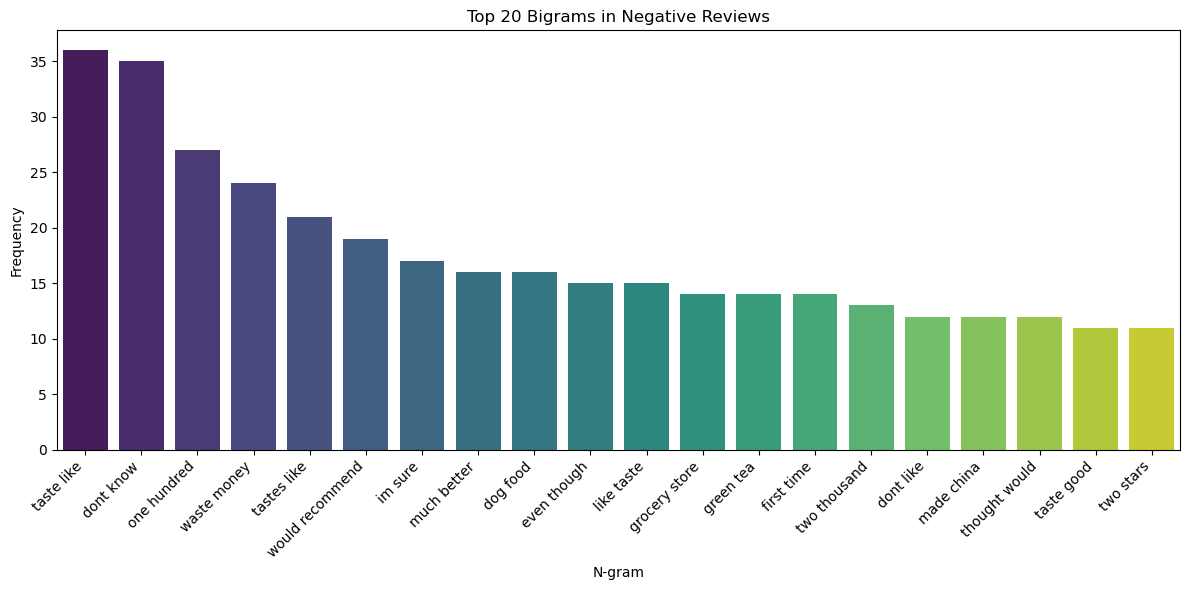

In [122]:
from nltk.util import ngrams

# Function to generate n-grams, count frequencies, and display a bar graph
def n_gram_frequency_graph(text_column, n=2, title=f"Top 20 Bigrams", top_n=20):
    n_grams = []
    for text in text_column:
        words = text.split()
        n_grams.extend(ngrams(words, n))
    n_gram_counts = Counter(n_grams)
    common_n_grams = n_gram_counts.most_common(top_n)

    # Convert n-grams to strings for plotting
    ngrams_strings = [" ".join(ngram) for ngram in dict(common_n_grams).keys()]
    freqs = list(dict(common_n_grams).values())

    plt.figure(figsize=(12, 6))
    sns.barplot(x=ngrams_strings, y=freqs, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.xlabel("N-gram")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Get common bigrams (2-word phrases) and display graphs
positive_bigrams = df[df['Sentiment'] == 'positive']['clean_review']
negative_bigrams = df[df['Sentiment'] == 'negative']['clean_review']

n_gram_frequency_graph(positive_bigrams, n=2, title="Top 20 Bigrams in Positive Reviews")
n_gram_frequency_graph(negative_bigrams, n=2, title="Top 20 Bigrams in Negative Reviews")

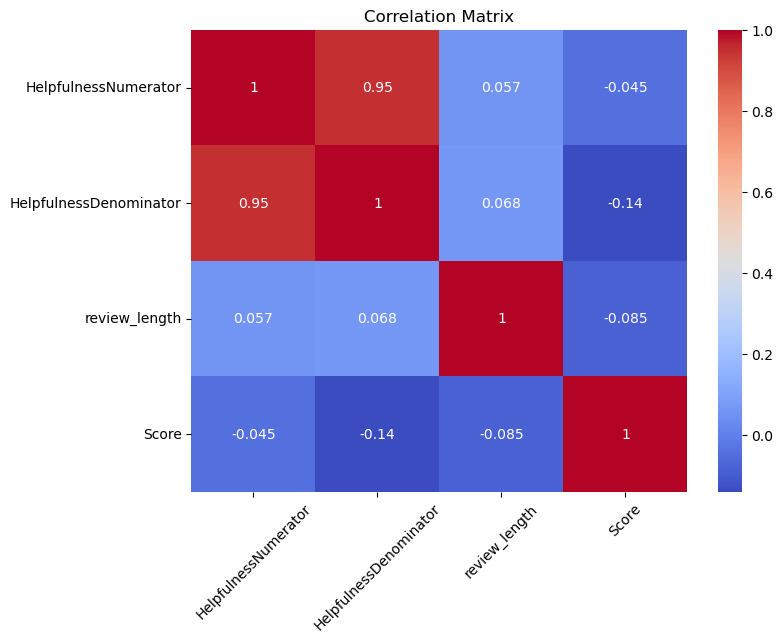

In [123]:
# Calculate the correlation matrix
correlation_matrix = df[['HelpfulnessNumerator', 'HelpfulnessDenominator', 'review_length', 'Score']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=45)
plt.show()

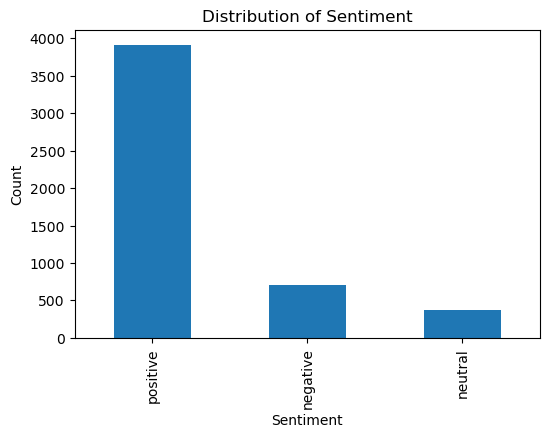

In [124]:
# Visualize the distribution of sentiment
plt.figure(figsize=(6, 4))
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Word Cloud for Positive Reviews


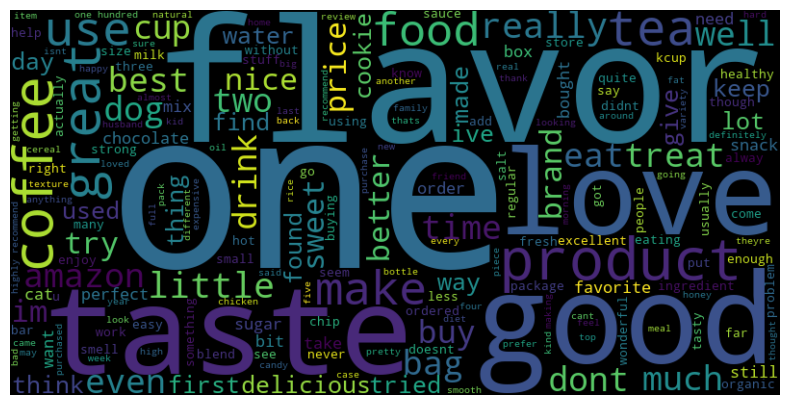

Word Cloud for Negative Reviews


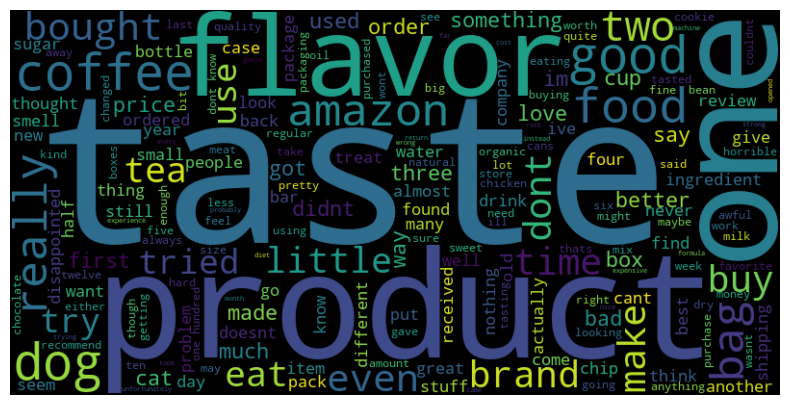

In [125]:
from wordcloud import WordCloud

# Function to generate word clouds
def generate_word_cloud(text_column):
    text = ' '.join(text_column)
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Generate word clouds for positive and negative reviews
print("Word Cloud for Positive Reviews")
generate_word_cloud(positive_reviews)

print("Word Cloud for Negative Reviews")
generate_word_cloud(negative_reviews)

# Deep Learning Model

In [126]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer # For one-hot encoding
from tensorflow.keras.callbacks import EarlyStopping # For early stopping
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight

# 1. Data Preparation

# Tokenization and Padding (as before)
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
padded_sequences = pad_sequences(sequences, maxlen=200, truncating='post')

# One-hot encode the target variable (multi-class)
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(df['Sentiment_Label'])  # shape: (num_samples, num_classes)
# Convert to numpy array
y = np.array(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, y, test_size=0.2, random_state=42)

#SMOTE 

# Before SMOTE
print("Before SMOTE:", Counter(np.argmax(y_train, axis=1)))

# Apply SMOTE with targeted oversampling
smote = SMOTE(random_state=42, sampling_strategy={0: int(len(y_train[np.argmax(y_train, axis=1) == 0]) * 1.5),  # Oversample class 0 by 50%
                                                1: int(len(y_train[np.argmax(y_train, axis=1) == 1]) * 4),    # Oversample class 1 by 300%
                                                2: int(len(y_train[np.argmax(y_train, axis=1) == 2]))})     # No oversample class 2

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("After SMOTE:", Counter(np.argmax(y_train_resampled, axis=1)))


class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(df['Sentiment_Label']), y=df['Sentiment_Label'])
class_weight_dict = dict(zip(label_binarizer.classes_, class_weights))

# 2. Model Architecture (Multi-class)

def create_model(vocab_size, embedding_dim, max_length, num_classes):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(64, return_sequences=True), # Increased LSTM units
        LSTM(32),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # softmax for multi-class
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # categorical_crossentropy
                  metrics=['accuracy'])
    return model

vocab_size = 10000
embedding_dim = 32
max_length = 200
num_classes = y.shape[1] # Get number of classes from y

model = create_model(vocab_size, embedding_dim, max_length, num_classes)

# 3. Training the Model

model.summary()

# Add Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Stop if val_loss doesn't improve for 3 epochs


history = model.fit(X_train, y_train,
                    epochs=20, # Increased epochs
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])


Before SMOTE: Counter({2: 3124, 0: 566, 1: 310})
After SMOTE: Counter({2: 3124, 1: 1240, 0: 849})


C:\Users\perei\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_21 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.7570 - loss: 0.8016 - val_accuracy: 0.7970 - val_loss: 0.5706
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.8354 - loss: 0.4534 - val_accuracy: 0.8240 - val_loss: 0.5310
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - accuracy: 0.8868 - loss: 0.2979 - val_accuracy: 0.8170 - val_loss: 0.6087
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.9153 - loss: 0.2004 - val_accuracy: 0.7840 - val_loss: 0.7971
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 65ms/step - accuracy: 0.9398 - loss: 0.1680 - val_accuracy: 0.7780 - val_loss: 1.0100


In [127]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

class_names = [str(i) for i in range(len(label_binarizer.classes_))]

print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
print(confusion_matrix(y_true_classes, y_pred_classes))

# Save the Keras model as an .h5 file
model.save("/artifacts/sentiment_model.h5")


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.61      0.38      0.47       137
           1       0.00      0.00      0.00        68
           2       0.84      0.97      0.90       795

    accuracy                           0.82      1000
   macro avg       0.49      0.45      0.46      1000
weighted avg       0.75      0.82      0.78      1000

[[ 52   0  85]
 [ 10   0  58]
 [ 23   0 772]]
